In [5]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Libraries**

In [6]:
#  Ignor warnings
import warnings
warnings.filterwarnings("ignore")

In [35]:
# Loading essential libraries for data analysis and machine learning.
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics
from xgboost import XGBRegressor

# libraries for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# libraries for optimize hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


# **Data**

**Load Data**

In [7]:
# Reading data from CSV files stored in Google Drive.

Input = pd.read_csv('/content/drive/MyDrive/data/Gully_train.csv')
Input_fused = pd.read_csv('/content/drive/MyDrive/data/Gully_train_fused.csv')

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Input=  pd.DataFrame(scaler.fit_transform(Input),columns = Input.columns)
Input_fused=  pd.DataFrame(scaler.fit_transform(Input_fused),columns = Input_fused.columns)

In [9]:
# Separating the features (X) from the target variable (y).
X = Input.drop(['gully'], axis = 1)
X_fused = Input_fused.drop(['gully','OBJECTID'], axis = 1)

In [10]:
# Target variable (y).
y = Input['gully']
y_fused = Input_fused['gully']

In [11]:
SA_Gully = pd.read_csv('/content/drive/MyDrive/data/SA_Gully.csv')
SA_Fused = pd.read_csv('/content/drive/MyDrive/data/SA_Fused.csv')

In [12]:
SA_Gully =  pd.DataFrame(scaler.fit_transform(SA_Gully),columns = SA_Gully.columns)
SA_Fused =  pd.DataFrame(scaler.fit_transform(SA_Fused),columns = SA_Fused.columns)


In [13]:
SA_Fused

,OBJECTID,NDVI,Lithology,dist_fault,dist_road,dist_river,soil_textu,Landcover,TWI,TPI,SPI,Slope,Profile_cur,Plan_Cur,Aspect,DEM,Rainfall
0,0.753316,0.532066,0.5,0.589809,0.063079,0.255089,0.875,0.500000,0.382637,0.474531,0.000440,0.141139,0.541288,0.445367,0.561082,0.069772,0.572036
1,0.753320,0.537680,0.5,0.590759,0.053710,0.232677,0.875,0.500000,0.477511,0.515042,0.000656,0.042519,0.505604,0.469436,0.377066,0.070315,0.573164
2,0.753325,0.548128,0.5,0.590759,0.053710,0.232677,0.875,0.500000,0.441642,0.491884,0.000151,0.083159,0.544253,0.450486,0.195309,0.067423,0.574288
3,0.753329,0.546243,0.5,0.590759,0.053710,0.232677,0.875,0.500000,0.512963,0.425404,0.001437,0.071644,0.430141,0.432847,0.501830,0.064051,0.575779
4,0.753334,0.548115,0.5,0.591800,0.044603,0.210352,0.875,0.500000,0.498738,0.490448,0.000771,0.093504,0.535996,0.441395,0.626594,0.065911,0.576893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222899,0.000587,0.558774,0.1,0.493413,0.148268,0.468142,0.500,0.166667,0.344879,0.392051,0.001205,0.163848,0.433152,0.440598,0.413095,0.265164,0.339857
222900,0.000591,0.548353,0.1,0.500469,0.138916,0.468142,0.500,0.500000,0.144299,0.597839,0.000326,0.207769,0.563647,0.482199,0.626594,0.274427,0.339031
222901,0.000596,0.566875,0.1,0.500469,0.138916,0.468142,0.500,0.500000,0.276226,0.410043,0.000707,0.151908,0.444498,0.453059,0.404813,0.267620,0.337920
222902,0.000600,0.590475,0.1,0.507529,0.129657,0.452882,0.500,0.500000,0.219460,0.549413,0.000207,0.132573,0.586275,0.440116,0.634152,0.273550,0.337079


In [14]:
SA_Gully = SA_Gully.drop(['OBJECTID'], axis = 1)
SA_Fused = SA_Fused.drop(['OBJECTID'], axis = 1)


# **Multicollinearity test using Variance Inflation Factor (VIF)**

In [15]:
from sklearn.linear_model import LinearRegression

# Function to calculate VIF
def calculate_vif(Input, Target):
    features = Input.columns[Input.columns != Target]
    X = Input[features]
    y = Input[Target]

    # Fit linear regression model
    lin_reg = LinearRegression().fit(X, y)

    # Calculate VIF
    vif = 1 / (1 - lin_reg.score(X, y))

    return vif

# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [calculate_vif(Input, col) for col in X.columns]

# Display the VIF values
print(vif_data)

      Variable       VIF
0         NDVI  1.632094
1    Lithology  1.198543
2   dist_fault  1.355544
3    dist_road  2.425152
4   dist_river  1.326719
5   soil_textu  1.353371
6    Landcover  1.241400
7          TWI  2.499854
8          TPI  3.605123
9          SPI  1.016933
10       Slope  1.869417
11  Profile_Cu  2.389438
12  Plan_Curva  1.480175
13      Aspect  1.111700
14         DEM  2.643631
15    Rainfall  1.601863


In [16]:
# Select Features that have VIF value more than 10.

Features_VIF=[]
for i in range(len(vif_data["VIF"])):
  if vif_data["VIF"][i] > 10 :
    Features_VIF.append(vif_data["feature"][i])

Features_VIF

[]

In [17]:
#  Remove high VIF features from X dataframe.

X = X.drop(Features_VIF, axis = 1)
X

,NDVI,Lithology,dist_fault,dist_road,dist_river,soil_textu,Landcover,TWI,TPI,SPI,Slope,Profile_Cu,Plan_Curva,Aspect,DEM,Rainfall
0,0.339373,0.5,0.869296,0.092371,0.026261,0.75,0.4,0.510098,0.413223,0.925063,0.114174,0.500273,0.590551,0.976925,0.001026,0.650980
1,0.390574,0.5,0.882775,0.055615,0.105045,0.00,0.0,0.490326,0.450037,0.925463,0.070736,0.501093,0.638360,0.988060,0.018471,0.639342
2,0.399026,0.5,0.882744,0.074472,0.058722,0.75,0.0,0.415409,0.630352,0.925367,0.043901,0.524403,0.752990,0.993876,0.018471,0.646158
3,0.406571,0.5,0.882775,0.055615,0.105045,0.00,0.0,0.276752,0.592787,0.925508,0.152553,0.561377,0.637342,0.986466,0.021036,0.640430
4,0.397646,0.5,0.800484,0.051637,0.026261,0.00,0.0,0.503470,0.462809,0.924715,0.114174,0.582032,0.592880,0.970947,0.012314,0.654531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,0.307190,0.1,0.110112,0.010327,0.058722,0.75,0.4,0.322478,0.507137,0.923518,0.097985,0.481298,0.615384,0.973936,0.488456,0.363907
1453,0.287838,0.1,0.123109,0.074472,0.267814,0.75,0.4,0.616244,0.407963,0.925856,0.070736,0.491137,0.520199,0.968500,0.497691,0.387571
1454,0.342431,0.1,0.093543,0.032658,0.026261,0.75,0.4,0.282962,0.313298,0.925781,0.470257,0.502772,0.615384,0.980844,0.446896,0.227965
1455,0.323945,0.1,0.027267,0.083263,0.148556,0.75,0.4,0.222620,0.519158,0.924471,0.292993,0.536155,0.616951,0.984863,0.464854,0.245041


# **Models**

**Split Data into Training and Testing Sets**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=True, random_state=1)

In [19]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_fused, y_fused, test_size = 0.3, shuffle=True, random_state=1)

**Build RF and XGBoost Models**

In [58]:
# Creating a Random Forest Regression model and Train the Model.
model_RF = RandomForestRegressor( random_state = 1).fit(X_train, y_train)
model_RF_fuse = RandomForestRegressor( random_state = 1).fit(X_train1, y_train1)

In [59]:
# Creating a XGBoost Regression model and Train the Model.
model_XGB = XGBRegressor(learning_rate= 0.015, max_depth= 4, n_estimators= 600).fit(X_train, y_train)
model_XGB_fuse = XGBRegressor(learning_rate= 0.015, max_depth= 4, n_estimators= 600).fit(X_train1, y_train1)

In [60]:
# Evaluate Model on Training Set.
yhat_train_RF = model_RF.predict(X_train)
r2_RF = metrics.r2_score(y_train, yhat_train_RF)
mae_RF = metrics.mean_absolute_error(y_train, yhat_train_RF)
mse_RF = metrics.mean_squared_error(y_train, yhat_train_RF)
rmse_RF = np.sqrt(mse_RF)


yhat_train_RF_fuse = model_RF_fuse.predict(X_train1)
r2_RF_fuse = metrics.r2_score(y_train1, yhat_train_RF_fuse)
mae_RF_fuse = metrics.mean_absolute_error(y_train1, yhat_train_RF_fuse)
mse_RF_fuse = metrics.mean_squared_error(y_train1, yhat_train_RF_fuse)
rmse_RF_fuse = np.sqrt(mse_RF_fuse)


yhat_train_XGB = model_XGB.predict(X_train)
r2_XGB = metrics.r2_score(y_train, yhat_train_XGB)
mae_XGB = metrics.mean_absolute_error(y_train, yhat_train_XGB)
mse_XGB = metrics.mean_squared_error(y_train, yhat_train_XGB)
rmse_XGB = np.sqrt(mse_XGB)


yhat_train_XGB_fuse = model_XGB_fuse.predict(X_train1)
r2_XGB_fuse = metrics.r2_score(y_train1, yhat_train_XGB_fuse)
mae_XGB_fuse = metrics.mean_absolute_error(y_train1, yhat_train_XGB_fuse)
mse_XGB_fuse = metrics.mean_squared_error(y_train1, yhat_train_XGB_fuse)
rmse_XGB_fuse = np.sqrt(mse_XGB_fuse)


In [61]:
# List1
lst_train = [[r2_RF,mae_RF, mse_RF,rmse_RF], [r2_RF_fuse,mae_RF_fuse, mse_RF_fuse,rmse_RF_fuse],
             [r2_XGB,mae_XGB, mse_XGB,rmse_XGB], [r2_XGB_fuse,mae_XGB_fuse, mse_XGB_fuse,rmse_XGB_fuse]]

df_train = pd.DataFrame(lst_train, index =['gully_RF', 'gully_fused_RF','gully_XGB', 'gully_fused_XGB' ]
                        ,columns= ['R2','MAE', 'MSE', 'RMSE'], dtype = float)

In [62]:
df_train

,R2,MAE,MSE,RMSE
gully_RF,0.949404,0.072718,0.012647,0.112461
gully_fused_RF,0.949795,0.072287,0.012550,0.112026
gully_XGB,0.883950,0.111270,0.029009,0.170320
gully_fused_XGB,0.889267,0.109072,0.027680,0.166373


In [63]:
# Evaluate Model on Testing Set.

yhat_test_RF = model_RF.predict(X_test)
r2_RF = metrics.r2_score(y_test, yhat_test_RF)
mae_RF = metrics.mean_absolute_error(y_test, yhat_test_RF)
mse_RF = metrics.mean_squared_error(y_test, yhat_test_RF)
rmse_RF = np.sqrt(mse_RF)


yhat_test_RF_fuse = model_RF_fuse.predict(X_test1)
r2_RF_fuse = metrics.r2_score(y_test1, yhat_test_RF_fuse)
mae_RF_fuse = metrics.mean_absolute_error(y_test1, yhat_test_RF_fuse)
mse_RF_fuse = metrics.mean_squared_error(y_test1, yhat_test_RF_fuse)
rmse_RF_fuse = np.sqrt(mse_RF_fuse)


yhat_test_XGB = model_XGB.predict(X_test)
r2_XGB = metrics.r2_score(y_test, yhat_test_XGB)
mae_XGB = metrics.mean_absolute_error(y_test, yhat_test_XGB)
mse_XGB = metrics.mean_squared_error(y_test, yhat_test_XGB)
rmse_XGB = np.sqrt(mse_XGB)

yhat_test_XGB_fuse = model_XGB_fuse.predict(X_test1)
r2_XGB_fuse = metrics.r2_score(y_test1, yhat_test_XGB_fuse)
mae_XGB_fuse = metrics.mean_absolute_error(y_test1, yhat_test_XGB_fuse)
mse_XGB_fuse = metrics.mean_squared_error(y_test1, yhat_test_XGB_fuse)
rmse_XGB_fuse = np.sqrt(mse_XGB_fuse)

In [64]:
# List1
lst_test = [[r2_RF,mae_RF, mse_RF,rmse_RF], [r2_RF_fuse,mae_RF_fuse, mse_RF_fuse,rmse_RF_fuse],
             [r2_XGB,mae_XGB, mse_XGB,rmse_XGB], [r2_XGB_fuse,mae_XGB_fuse, mse_XGB_fuse,rmse_XGB_fuse]]

df_test = pd.DataFrame(lst_test, index =['gully_RF', 'gully_fused_RF','gully_XGB', 'gully_fused_XGB' ]
                        ,columns= ['R2','MAE', 'MSE', 'RMSE'], dtype = float)

In [52]:
df_test

,R2,MAE,MSE,RMSE
gully_RF,0.611395,0.197511,0.097078,0.311574
gully_fused_RF,0.617426,0.204475,0.095572,0.309147
gully_XGB,0.604177,0.205480,0.098882,0.314454
gully_fused_XGB,0.626846,0.202857,0.093218,0.305317


# **Feature Importance**

In [ ]:
imp =[]
for i in range(100):
  model = RandomForestRegressor(random_state = 1)
  model.fit(X_train1, y_train1)
  importance = model.feature_importances_
  imp.append(importance)

In [ ]:
feature_importances = np.array([sum(sub_list) / len(sub_list) for sub_list in zip(*imp)])

In [ ]:
feature_names = ['NDVI',
 'Lithology',
 'Dist fault',
 'Dist road',
 'Dist river',
 'Soil texture',
 'Landcover',
 'TWI',
 'TPI',
 'SPI',
 'Slope',
 'Profile Curvature',
 'Plan Curvature',
 'Aspect',
 'Altitude',
 'Rainfall']
# Sort the feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

print("Feature ranking:")

for i in range(len(sorted_idx)):
    print(f"{i + 1}. Feature '{feature_names[sorted_idx[i]]}' ({feature_importances[sorted_idx[i]]:.4f})")

Feature ranking:
1. Feature 'Dist road' (0.2693)
2. Feature 'Rainfall' (0.1939)
3. Feature 'Dist river' (0.1237)
4. Feature 'Dist fault' (0.0758)
5. Feature 'Altitude' (0.0668)
6. Feature 'TPI' (0.0465)
7. Feature 'NDVI' (0.0368)
8. Feature 'TWI' (0.0361)
9. Feature 'SPI' (0.0331)
10. Feature 'Aspect' (0.0316)
11. Feature 'Plan Curvature' (0.0256)
12. Feature 'Slope' (0.0224)
13. Feature 'Profile Curvature' (0.0171)
14. Feature 'Landcover' (0.0087)
15. Feature 'Lithology' (0.0080)
16. Feature 'Soil texture' (0.0046)


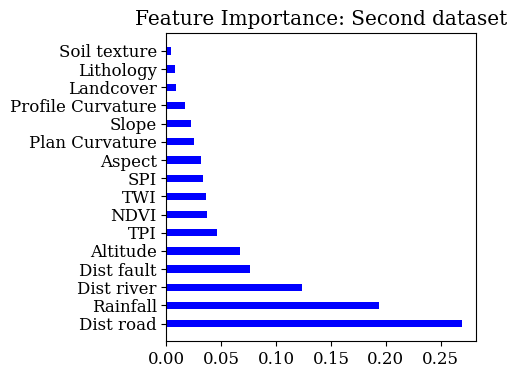

In [ ]:
# Plotting the Feature Importance
plt.rcParams.update({'font.size': 12})
plt.rcParams['font.family'] = 'serif'


plt.figure(figsize=(4, 4))
labels = np.array(feature_names)[sorted_idx]
plt.barh(labels, feature_importances[sorted_idx],color = "b",height = 0.4)
plt.title("Feature Importance: Second dataset")
plt.savefig('/content/drive/MyDrive/session_2/FI_Seconddd.png',dpi=1000, bbox_inches='tight')
plt.show()

# **Save Predictions**

**Prediction For StudyArea**


In [31]:
SA_pred_RF = model_RF.predict(SA_Gully)
SA_pred_RF_fuse = model_RF_fuse.predict(SA_Fused)

SA_pred_XGB = model_XGB.predict(SA_Gully)
SA_pred_XGB_fuse = model_XGB_fuse.predict(SA_Fused)

In [33]:
# Export predictions to a CSV file.
output_RF = pd.DataFrame(SA_pred_RF)
output_RF.to_csv('/content/drive/MyDrive/data/pred_gully_RF.csv')

In [32]:
# Export predictions to a CSV file.
output_RF_fuse = pd.DataFrame(SA_pred_RF_fuse)
output_RF_fuse.to_csv('/content/drive/MyDrive/data/pred_fused_RF.csv')

In [ ]:
output_XGB = pd.DataFrame(SA_pred_XGB)
output_XGB.to_csv('/content/drive/MyDrive/data/pred_gully_XGB.csv')

In [ ]:
output_XGB_fuse = pd.DataFrame(SA_pred_XGB_fuse)
output_XGB_fuse.to_csv('/content/drive/MyDrive/data/pred_gully_XGB_Fuse.csv')

# **Plots**

**Error Histogram**

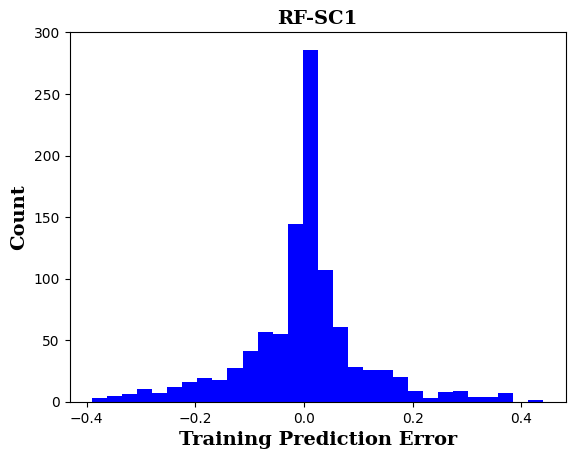

In [71]:
# Error Histogram
error = y_train['gully'] - yhat_train_RF
csfont = {'fontname':'Serif',
         'weight' : 'bold',
        'size'   : 14}
plt.hist(error, bins = 30, color = 'b')
plt.title('RF-SC1', **csfont)
plt.xlabel('Training Prediction Error',**csfont)
plt.ylabel('Count',**csfont)
plt.savefig("/content/drive/MyDrive/session_2/Train_RF_SC1.png", format="png", dpi=1000, bbox_inches="tight")
plt.show()

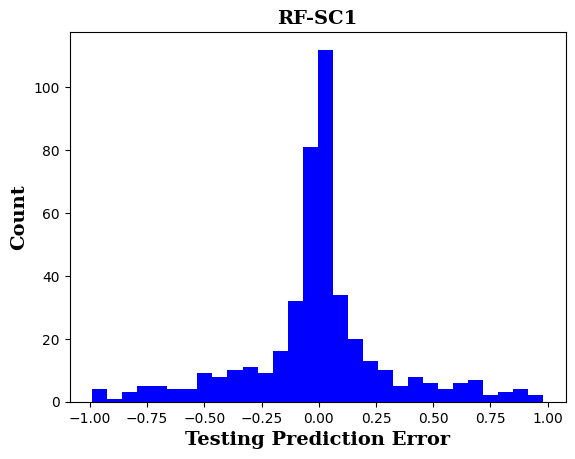

In [70]:
# Error Histogram
error = y_test['gully'] - yhat_test_RF
plt.hist(error, bins = 30, color = 'b')
plt.title('RF-SC1', **csfont)
plt.xlabel('Testing Prediction Error',**csfont)
plt.ylabel('Count',**csfont)
plt.savefig("/content/drive/MyDrive/session_2/Test_RF_SC1.png", format="png", dpi=1000, bbox_inches="tight")
plt.show()

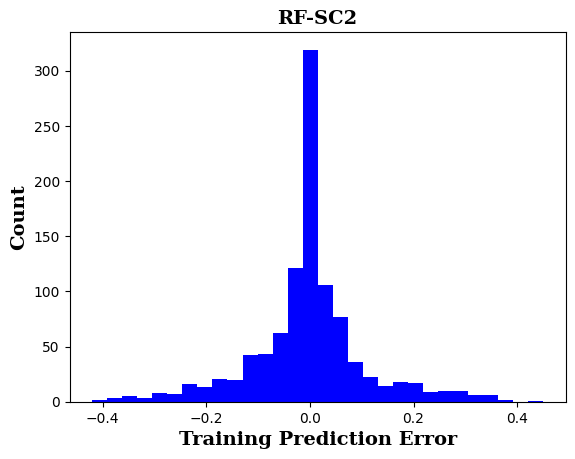

In [81]:
# Error Histogram
error = y_train1 - yhat_train_RF_fuse
csfont = {'fontname':'Serif',
         'weight' : 'bold',
        'size'   : 14}
plt.hist(error, bins = 30, color = 'b')
plt.title('RF-SC2', **csfont)
plt.xlabel('Training Prediction Error',**csfont)
plt.ylabel('Count',**csfont)
plt.savefig("/content/drive/MyDrive/session_2/Train_RF_SC2.png", format="png", dpi=1000, bbox_inches="tight")
plt.show()

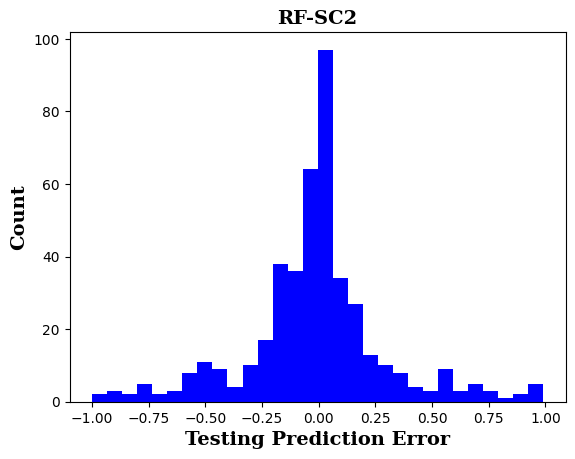

In [83]:
# Error Histogram
error = y_test1 - yhat_test_RF_fuse
plt.hist(error, bins = 30, color = 'b')
plt.title('RF-SC2', **csfont)
plt.xlabel('Testing Prediction Error',**csfont)
plt.ylabel('Count',**csfont)
plt.savefig("/content/drive/MyDrive/session_2/Test_RF_SC2.png", format="png", dpi=1000, bbox_inches="tight")
plt.show()

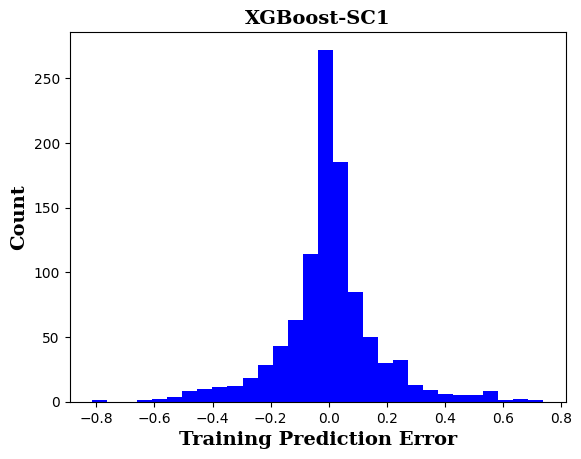

In [86]:
# Error Histogram
error = y_train['gully'].values - yhat_train_XGB
csfont = {'fontname':'Serif',
         'weight' : 'bold',
        'size'   : 14}
plt.hist(error, bins = 30, color = 'b')
plt.title('XGBoost-SC1', **csfont)
plt.xlabel('Training Prediction Error',**csfont)
plt.ylabel('Count',**csfont)
plt.savefig("/content/drive/MyDrive/session_2/Train_XGB_SC1.png", format="png", dpi=1000, bbox_inches="tight")
plt.show()

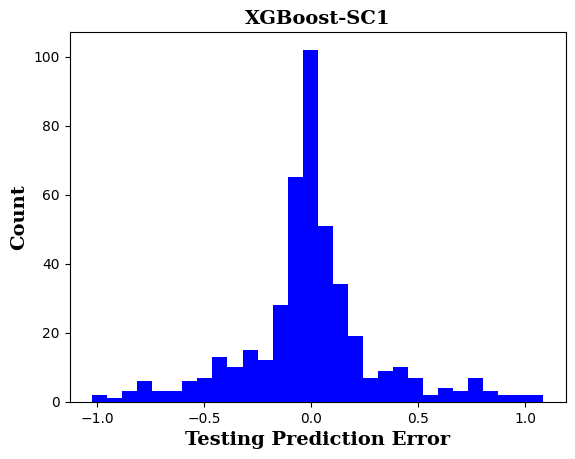

In [88]:
# Error Histogram
error = y_test['gully'].values - yhat_test_XGB
plt.hist(error, bins = 30, color = 'b')
plt.title('XGBoost-SC1', **csfont)
plt.xlabel('Testing Prediction Error',**csfont)
plt.ylabel('Count',**csfont)
plt.savefig("/content/drive/MyDrive/session_2/Test_XGB_SC1.png", format="png", dpi=1000, bbox_inches="tight")
plt.show()

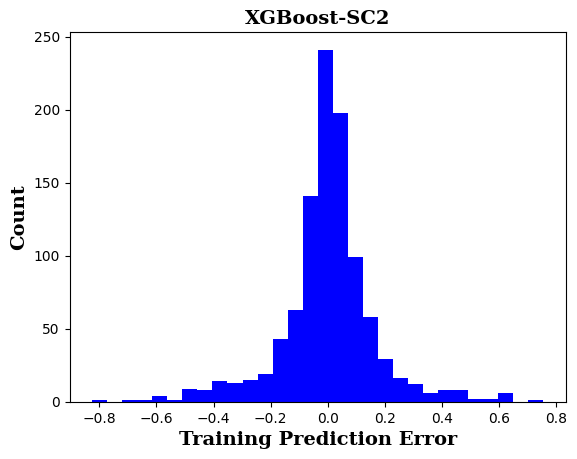

In [89]:
# Error Histogram
error = y_train1 - yhat_train_XGB_fuse
csfont = {'fontname':'Serif',
         'weight' : 'bold',
        'size'   : 14}
plt.hist(error, bins = 30, color = 'b')
plt.title('XGBoost-SC2', **csfont)
plt.xlabel('Training Prediction Error',**csfont)
plt.ylabel('Count',**csfont)
plt.savefig("/content/drive/MyDrive/session_2/Train_XGB_SC2.png", format="png", dpi=1000, bbox_inches="tight")
plt.show()

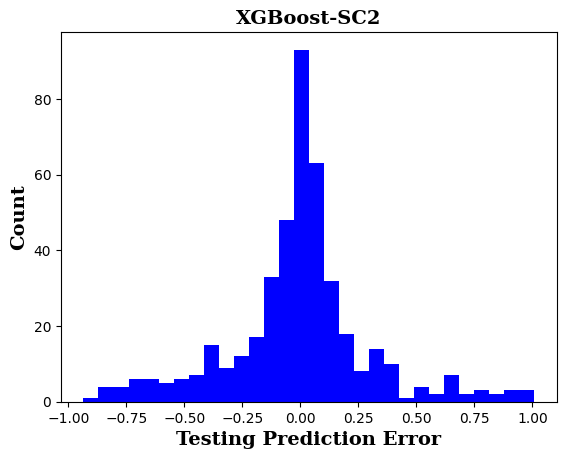

In [91]:
# Error Histogram
error = y_test1 - yhat_test_XGB_fuse
plt.hist(error, bins = 30, color = 'b')
plt.title('XGBoost-SC2', **csfont)
plt.xlabel('Testing Prediction Error',**csfont)
plt.ylabel('Count',**csfont)
plt.savefig("/content/drive/MyDrive/session_2/Test_XGB_SC2.png", format="png", dpi=1000, bbox_inches="tight")
plt.show()